## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').user_id.nunique() / df.user_id.nunique()

0.12104245244060237

> **Explanations:** I found the proportion of users converted for number of unique user ids

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
num_of_tre_old=df.query('group == "treatment" and landing_page == "old_page"').user_id.nunique()
num_of_tre_old

1965

In [7]:
num_of_cont_new=df.query('group == "control" and landing_page == "new_page"').user_id.nunique()
num_of_cont_new

1928

In [8]:
num_of_tre_old + num_of_cont_new

3893

> **Explanations:** I found the unmatched "new_page-treatment" expression by adding "treatment-old_page" and "control-new_page" statements. 

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


> **Explanations:** There is No missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2=df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

> **Explanations:** I used query method to find rows where "treatment" matchs with "new_page" and "control" matchs with "old_page"

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
ids = df2["user_id"]
ids[ids.duplicated()]

2893    773192
Name: user_id, dtype: int64

> **Explanations:** duplicated user_id is 773192.

c. What is the row information for the repeat **user_id**? 

In [14]:
# Seeing the duplicated rows

df2[ids.isin(ids[ids.duplicated()])]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


> **Explanations:** "ids[ids.duplicated()]" expression give me duplicated user_id. When I use this expression with isin method, all duplicated rows returns.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2=df2.drop(1899)

In [16]:
df2.loc[1898:1903]

,user_id,timestamp,group,landing_page,converted
1898,771469,2017-01-03 09:42:51.142832,control,old_page,0
1900,904789,2017-01-05 18:56:06.947242,treatment,new_page,0
1901,891777,2017-01-05 15:50:21.760941,control,old_page,0
1902,919317,2017-01-22 06:06:34.818425,treatment,new_page,0
1903,897468,2017-01-08 21:48:21.488312,treatment,new_page,1


> **Explanations:** I droped the 1899th row and checked it whether  it was deleted

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
(df2['landing_page'] == 'new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> **Explanations:** There is no remarkable differences between the probabilities of an individual converting, control group converting and treatment group converting. It doesn't seem that there is an in favor to new_page. All is approximately 12%. Additionally, landing_page percentage is also 50%. There is no sufficient evidence to conclude that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_0: p_{old}-p_{new} >= 0 $$
$$H_1: p_{new}-p_{old} > 0 $$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new=df2.query('landing_page == "new_page"')['converted'].mean()
p_new

0.11880806551510564

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old=df2.query('landing_page == "old_page"')['converted'].mean()
p_old

0.1203863045004612

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new=df2[df2["group"]=='treatment'].count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old=df2[df2["group"]=='control'].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted=df2.query('group == "treatment"')['converted']
new_page_converted.head()

2    0
3    0
6    1
8    1
9    1
Name: converted, dtype: int64

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted=df2.query('group == "control"')['converted']
old_page_converted.head()

0    0
1    0
4    1
5    0
7    0
Name: converted, dtype: int64

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
obs_diff=new_page_converted.mean()-old_page_converted.mean()
obs_diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
# Create a sampling distribution of the difference in rates

new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted

In [30]:
p_diffs

array([-0.00074529, -0.00115838,  0.00108518, ..., -0.00232846,
       -0.00145417, -0.00024298])

> **Explanations:** I didn't use **for** loop because of computational problem. **for** loops take considerable amount of time. So I used numpy-based operations.

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

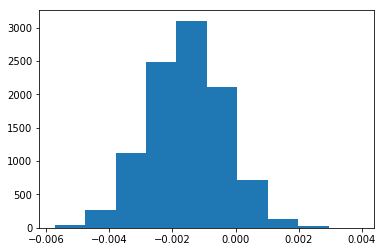

In [31]:
plt.hist(p_diffs);

> **Explanations:** This plot look like what I expected. I made 10000 iteration. In each iteration, I used bootstraping to samplimg data, I kept the convertion rate for both treatment and control group. I also calculated differences 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 and stored all the differences in a list. I expect that the result must be like normaly distrubeuted.
 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

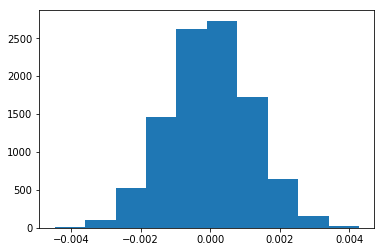

In [32]:
# Simulating distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# Plotting the null distribution
plt.hist(null_vals);

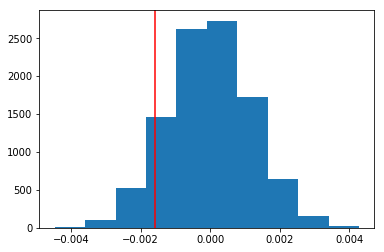

In [33]:
# Plotting observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red');

In [34]:
# Computing p-value
(null_vals > obs_diff).mean()

0.90269999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> **Explanations:** This value is p-value. The p-value is the probability of our statistic or one more extereme in favor of the alternative hypothesis. If the p value is less than alpha (Type-1 Error), it means we can reject the null hypothesis (Choose H1 hypothesis). Otherwise fail to reject the null hypothesis (Choose H0 hypothesis).

> **Explanations:** In this case, at the and of the calculation, pvalue turned out to be too high. That means we can not reject null hypothesis. Fail to Reject.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
#Computing z-score and p-value with stats.proportions_ztest

counts=[convert_new, convert_old ]
nobs=[n_new, n_old ]

counts=np.array(counts)
nobs=np.array(nobs)

counts , nobs

(array([17264, 17489]), array([145310, 145274]))

In [37]:
#Computing z-score and p-value with stats.proportions_ztest

stat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='larger')

stat, pval

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> **Explanations:** z-score is (-1.31). That means we need to check z-score table by using -1.3 and 0.001 values. When I checked the z-score, I saw 0.0951 value. This is the area of the normal distrubution. This value is greater than our alpha (0.05). That means we can not reject null hypothesis. .Fail to Reject.

> **Explanations:** p-value is (0.905). This value is greater than our alpha (0.05). That means we can not reject null hypothesis. Fail to Reject.  
z-core and p-value are agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
# Adding intercept column

df2['intercept']=1

In [39]:
# Adding get dummies for column 'group'

df2[['cont_1','ab_page']]=pd.get_dummies(df2['group'])

In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,cont_1,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [41]:
# Drop the residual column (control values 1)

df2=df2.drop(['cont_1'],axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [42]:
# creating model 

logit_mod=sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results=logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-03-14 16:01 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

> **Explanations:** ab_page p-value is 0.1899 and my p-value was 0.905 in Part-II. This differences is related to apply one-tailed test and two-taliled test. Using a one-tailed test is testing for the possibility of the relationship in one direction and completely disregarding the possibility of a relationship in the other direction. **In Part-II I used one tailed test because of my Ho and my H1.** In Part-III, I used Logistic Regression and according to Logistic ression, null hypothesis beta coefficient is equal to zero,  alternative hypothesis assumes that beta coefficient is not equal to zero. That means two-tailed test. Using a two-tailed test is testing for the possibility of the relationship in two direction. As a consequence, since I changed Ho and H1, that is, I changed test type from one-tailed test to two tailed test, I saw a different p-value in Part-III.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> **Explanations:** I should consider whether the additional factors are likely to be relevant to the outcome variable. Adding irrelevant factors to the model can reduce its predictive power and increase the risk of overfitting.
Additionally, I should consider the potential for multicollinearity between the existing factors and the new factors. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can lead to unstable and unreliable estimates of the regression coefficients. I need to check variance inflation factor (VIF).

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
df_countries=pd.read_csv('countries.csv')

In [45]:
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
df3=df2.join(df_countries.set_index('user_id'), on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [47]:
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [48]:
# the probability of individual converting for all dataset

df3.converted.mean()

0.11959708724499628

In [49]:
# the probability of US converting 

df3[df3['country'] == "US"]['converted'].mean()

0.1195468006423762

In [50]:
# the probability of UK converting 

df3[df3['country'] == "UK"]['converted'].mean()

0.12059448568984076

In [51]:
# the probability of CA converting 

df3[df3['country'] == "CA"]['converted'].mean()

0.11531829781364232

In [52]:
df3[['CA','UK','US']]=pd.get_dummies(df3['country'])

In [53]:
df3=df3.drop(['CA'],axis=1) # Because CA is my baseline
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


> **Explanations:** There is no remarkable differences between the probabilities of individual converting, US converting, UKS converting and CA converting in terms of country column. It doesn't seem that there is an in favor to new_page. All is approximately 12%. There is no sufficient evidence to conclude that the country leads to more conversions.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
df3['ab_page_US'] = df3['ab_page'] * df3['US']
df3['ab_page_UK'] = df3['ab_page'] * df3['UK']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,ab_page_US,ab_page_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


In [55]:
final_model = sm.Logit(df3['converted'], df3[['intercept','ab_page','US','UK','ab_page_US','ab_page_UK']])
results=final_model.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [56]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-03-14 16:01 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
ab_page_US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_page_UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

In [57]:
np.exp(results.params)

intercept     0.134794
ab_page       0.934776
US            1.017682
UK            1.011854
ab_page_US    1.048001
ab_page_UK    1.081428
dtype: float64

> **Explanations:** When I check the results; ab_page, UK, US, ab_page_US, ab_page_UK are almost 1. That means, there is no sufficent effect to the results. These additional columns didn't change the result. 

### Conclusion:
> Since each row is either a conversion or no conversion, I choosed Logistic Regression model. Before model fitting, I added new columns intercept and ab_page then checked the p_values. after fitting, the p-value was grater than our alpha. I also joined the other country information to my data set in order to see the impact on conversion. Additionally I added some columns to look at an interaction between page and country to see if there significant effects on conversion. I fitted the model again and checked the impact of factors to our model. All factors were almost 1. 
After all my calculation, **switching to the new page is not sensible according to statistical significance**. It is also important to take into consideration practical significance in making decisions. Practical significance takes into consideration other factors of situation. Under the shared data and conditions, it doesn't seems that practically make sense either.



<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0